# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import class
from inauguralproject1 import ExchangeEconomyClass
E_class = ExchangeEconomyClass()

# Question 1

<u>**Explanation of the model is solved**</u>

**Parameterization:** To begin we definine the parameters such as utility functions, initial endowments, and numerical values $ \alpha $, $ \beta $, $\omega_1^A$, $\omega_2^A$ and $N$.

**Utility Functions:** The utility functions for both consumers are defined. These functions represent the preferences of each consumer over the two goods.

**Allocation Grid:** A grid of possible allocations for the first consumer ($ x_1^A $ and $ x_2^A $) is created using `np.linspace()`. This grid represents all possible combinations of goods that can be allocated to the first consumer within the unit interval [0, 1].

**Valid Combinations:** For each combination of $ x_1^A $ and $ x_2^A $ in the grid, the corresponding allocations to the second consumer ($ x_1^B $ and $ x_2^B $) are calculated. If the allocations satisfy the given conditions (both consumers are at least as well off as they were with their initial endowments), they are considered valid and added to the list of valid allocations.

**Plotting:** The valid allocations are plotted in the Edgeworth box using `plt.plot()`.

<u>**Explation of the Edgeworth box**</u>

The Edgeworth box in this first question represents the possible combinations of goods $x_1$ and $x_2$ that can be allocated between two consumers, represtened as Consumer $A$ and Consumer $B$. Each axis of the box represents the quantity of $x_1$ and $x_2$.

In the plot each point corresponds to a combination of $x_1^A$ and $x_2^A$, representing the allocation of goods to Consumer $A$. The set of points in the plot illustrates the possible allocations that satisfy the conditions specified in the problem, which are:

1. Both consumers are at least as well off as they were with their initial endowments.
2. Consumer $B$'s utility is at least as high as with their initial endowment.
3. The quantities of goods allocated to both consumers add up to the total endowment of each good such that
\begin{align*}
\omega_{1}^{B} & =1-\omega_{1}^{A}\\
\omega_{2}^{B} & =1-\omega_{2}^{A}.
\end{align*}


The Edgeworth box provides a visual representation of the possible Pareto improvements relative to the initial endowments which is the egde of dotted area. Points inside the box represent allocations that are mutually beneficial to both consumers, while points on the boundary represent allocations where one consumer's utility cannot be increased without decreasing the other's utility.





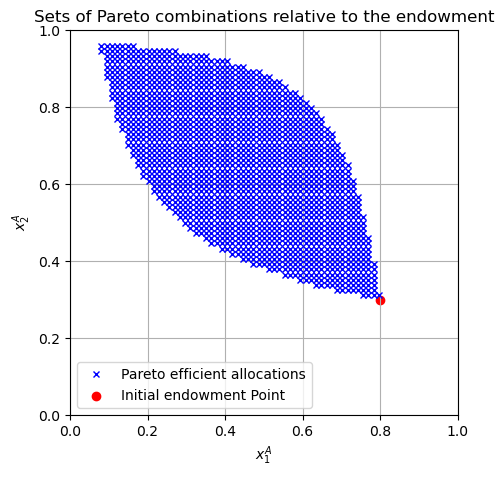

In [2]:
# Run function from class to find the pareto efficient allocations
valid_x1_A, valid_x2_A = E_class.pareto_efficient_allocations()

# Plot the sets in the Edgeworth box
plt.figure(figsize=(5, 5))
plt.plot(valid_x1_A, valid_x2_A, 'bx', markersize=4)  # Plotting valid combinations. 'b' for blue 'x' for cross
plt.scatter(0.8, 0.3, color='red', marker='o', label='Endowment Points')
plt.xlabel('$x_1^A$')  # Labeling x-axis
plt.ylabel('$x_2^A$')  # Labeling y-axis
plt.title('Sets of Pareto combinations relative to the endowment')  # Title of the plot
plt.grid(True)  # Adding grid lines

# Add a legend with the endowment points
plt.legend(['Pareto efficient allocations', 'Initial endowment Point'])

# Set x and y axis limits to the interval [0, 1]
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()  # Displaying the plot

# Question 2


This code calculates the errors in the market clearing conditions $ \epsilon_1$ and $\epsilon_2$ for a given range of $ p_1 $ values and plots them against $p_1$. The code first calculate values for the variabels $x_1^A\ast$, $x_2^A\ast$, $x_1^B\ast$ and $x_2^B\ast$ with starting point in created range of $p_1$ values. It is now possible to calculate the errors ($\epsilon_1$ and $\epsilon_2$). The error values are now plotted over each values of $p_1$ which is seen in the plot. The intersection as seen must be the market clearing where the error also equals zero.

In [3]:
# Range of p1 values
p1_values = np.linspace(0.5, 2.5, E_class.par.N)


# Calculate errors for the range of p1 values
errors = E_class.market_clearing_error(p1_values)

NameError: name 'p1_values' is not defined

In [ ]:
# Function to calculate error in market clearing conditions
def market_clearing_error(p1):
    errors = []
    for p in p1:
        # Using necessary information giving in the start of the project  
        # Calculate allocations for consumer A 
        x1_A_star = alpha * (p * omega_1A + omega_2A) / p
        x2_A_star = (1 - alpha) * (p * omega_1A + omega_2A) / 1
        # Calculate allocations for consumer B
        x1_B_star = beta * (p * (1 - omega_1A) + (1 - omega_2A)) / p
        x2_B_star = (1 - beta) * (p * (1 - omega_1A) + (1 - omega_2A)) / 1
        # Calculate errors by equations giving in the question
        error1 = x1_A_star - omega_1A + x1_B_star - (1 - omega_1A)
        error2 = x2_A_star - omega_2A + x2_B_star - (1 - omega_2A)
        # Append the errors to the before empty array 'errors'
        errors.append((error1, error2))
    return errors

# Range of p1 values
p1_values = np.linspace(0.5, 2.5, N)

# Calculate errors for the range of p1 values
errors = market_clearing_error(p1_values)

# Plot errors
plt.figure(figsize=(8, 6))
plt.plot(p1_values, [error[0] for error in errors], label='$\epsilon_1$', color='blue')
plt.plot(p1_values, [error[1] for error in errors], label='$\epsilon_2$', color='red')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Market Clearing Errors')
plt.legend()
plt.grid(True)
plt.show()

# Show intersection of the two curves
print('Intersection of the two curves is at p1 =', p1_values[np.argmin([np.sqrt(error[0]**2 + error[1]**2) for error in errors])])


# Question 3

To find the intersection on the above graph we will use np.isclose which is a function from NumPy that here see if the sum of x1_A_star + x1_B_star is close to 1 and the same for x2_A_star + x2_B_star. If this is true it return the price ($p_1$) where the values are close to 1. Hereby we find the market clearing price.

In [ ]:
# Function to calculate market clearing price
def market_clearing_price():
    # Solve market clearing conditions for p1 = p* with a interval of 10000
    for p1 in np.linspace(0.5, 2.5, 10000):
        # Calculate allocations for consumer A
        x1_A_star = alpha * (p1 * omega_1A + omega_2A) / p1
        x2_A_star = (1 - alpha) * (p1 * omega_1A + omega_2A) / 1
        # Calculate allocations for consumer B
        x1_B_star = beta * (p1 * (1 - omega_1A) + (1 - omega_2A)) / p1
        x2_B_star = (1 - beta) * (p1 * (1 - omega_1A) + (1 - omega_2A)) / 1
        # Check if market clears that is if x1_A_star + x1_B_star is close to 1 and the same
        # for x2_A_star + x2_B_star with the implemting of Walras' law
        if np.isclose(x1_A_star + x1_B_star, 1) and np.isclose(x2_A_star + x2_B_star, 1):
            return p1  # Return the market clearing price when found

# Calculate market clearing price and set as variabel name p_star
p_star = market_clearing_price()

#print p_star if found else write that p_star not found
if p_star is not None:
    print("The market clearing price will be: p_1 =", p_star)
else:
    print("No market clearing price found within the given range of p1 values.")

# Question 4a


In [ ]:
P1 = np.linspace(0.5, 2.5, N)  # Define your set of discrete prices

optimal_p_1, optimal_consumption_A, max_utility = E_class.max_u_A(P1)
print(f"Optimal price for Consumer A (discrete): {optimal_p_1:.4f}")
print(f"Optimal allocation for Consumer A: x1A={optimal_consumption_A[0]:.4f}, x2A={optimal_consumption_A[1]:.4f}")
print(f"Maximum utility for Consumer A: {max_utility:.4f}")

# Question 4b

explain code

In [ ]:
# Assuming 'model' is an instance of your ExchangeEconomyClass
optimal_price_continuous, optimal_allocation_A_continuous, max_utility_continuous = E_class.max_u_A_cont()

# Displaying the results
print(f"Optimal price for Consumer A (continuous): {optimal_price_continuous:.4f}")
print(f"Optimal allocation for Consumer A: x1A={optimal_allocation_A_continuous[0]:.4f}, x2A={optimal_allocation_A_continuous[1]:.4f}")
print(f"Maximum utility for Consumer A: {max_utility_continuous:.4f}")

ADD CONCISE CONLUSION.

# Question 5a.

Explanation

In [ ]:
# Define the utility function for consumer A with a different name
def calculate_u_A(x1_A, x2_A):
    """
    Utility function for consumer A.
    Args:
        x1_A: Quantity of good x1 allocated to consumer A.
        x2_A: Quantity of good x2 allocated to consumer A.
    Returns:
        Utility value for consumer A given the allocation.
    """
    return x1_A ** alpha * x2_A ** (1 - alpha)

# Initialize variables to store the optimal allocation and utility
optimal_allocation = None
max_utility = -float('inf')

# Iterate through valid combinations and find the one with maximum utility
for i in range(len(valid_x1_A)):
    x1_A = valid_x1_A[i]
    x2_A = valid_x2_A[i]
    utility = calculate_u_A(x1_A, x2_A)  # Call the utility function using the new name
    if utility > max_utility:
        max_utility = utility
        optimal_allocation = (x1_A, x2_A)

# Print the optimal allocation and its utility
print("Optimal Allocation (x1^A, x2^A):", optimal_allocation)
print("Maximum Utility:", max_utility)


# Question 5b.

Explanation

In [ ]:
from scipy.optimize import minimize
# Parameters
alpha = 1 / 3
beta = 2 / 3
omega_1A = 0.8
omega_2A = 0.3
omega_1B = 1 - omega_1A
omega_2B = 1 - omega_2A

# Utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

# Parameters and utility/demand functions remain the same as before

# Initial utility levels for comparison
initial_utility_A = uA(omega_1A, omega_2A)
initial_utility_B = uB(omega_1B, omega_2B)

# Objective function: Maximize A's utility
def objective(x):
    xA1, xA2 = x
    return -uA(xA1, xA2)  # Negative because we use minimize

# Constraints for Pareto improvements and total consumption
constraints = (
    {'type': 'ineq', 'fun': lambda x: uB(1 - x[0], 1 - x[1]) - initial_utility_B},  # uB(1-xA1, 1-xA2) >= uB(ω1B, ω2B)
)

# Initial guess (could be the initial endowments)
x0 = [omega_1A, omega_2A]

# Bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Perform the optimization
result = minimize(objective, x0, bounds=bounds, constraints=constraints)

if result.success:
    optimal_xA1, optimal_xA2 = result.x
    optimal_utility = -result.fun
    print(f"Optimal Allocation: xA1 = {optimal_xA1}, xA2 = {optimal_xA2}, Maximum Utility for A: {optimal_utility}")
else:
    print("Optimization was not successful. Please check the constraints and initial guess.")

# Question 6a.

Explanation

In [ ]:
from scipy.optimize import minimize
# Parameters
alpha = 1 / 3
beta = 2 / 3
omega_1A = 0.8
omega_2A = 0.3
omega_1B = 1 - omega_1A
omega_2B = 1 - omega_2A

# Utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

def aggregate_u(x1, x2):
    return uA(x1, x2) + uB(1 - x1, 1 - x2)

# Parameters and utility/demand functions remain the same as before
# Objective function: Maximize A's utility
def objective(x):
    xA1, xA2 = x
    return -aggregate_u(xA1, xA2)  # Negative because we use minimize

# Initial guess (could be the initial endowments)
x0 = [omega_1A, omega_2A]

# Bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Perform the optimization
result = minimize(objective, x0, bounds=bounds)

if result.success:
    optimal_agg_xA1, optimal_agg_xA2 = result.x
    optimal_agg_utility = -result.fun
    print(f"Optimal Allocation: xA1 = {optimal_agg_xA1}, xA2 = {optimal_agg_xA2}, Maximum Utility for A: {optimal_agg_utility}")
else:
    print("Optimization was not successful. Please check the constraints and initial guess.")

# Question 6b.

Explanation

In [ ]:
import matplotlib.pyplot as plt

# Given points with labels, colors, and markers
points = {
    '4.B': {'coordinates': (0.6210, 0.6400), 'color': 'blue', 'marker': 's', 'size': 100},
    '5.B': {'coordinates': (0.575, 0.844), 'color': 'red', 'marker': 's', 'size': 100},
    '6.A (AGG_ALL)': {'coordinates': (0.333, 0.666), 'color': 'purple', 'marker': 's', 'size': 100}
}

# Plot the sets in the Edgeworth box
plt.figure(figsize=(8, 8))
plt.plot(valid_x1_A, valid_x2_A, 'bx', markersize=4)  # Plotting valid combinations. 'b' for blue 'x' for cross
plt.scatter(0.8, 0.3, color='g', marker='o', label='Endowment Points')

# Insert given points
for label, point_info in points.items():
    coordinates = point_info['coordinates']
    color = point_info['color']
    marker = point_info['marker']
    
    plt.scatter(coordinates[0], coordinates[1], color=color, marker=marker, label=label)
    plt.text(coordinates[0] - 0.05, coordinates[1] + 0.02, label, fontsize=8, color='black', ha='right')

plt.xlabel('$x_1^A$')  # Labeling x-axis
plt.ylabel('$x_2^A$')  # Labeling y-axis
plt.title('Sets of Pareto combinations relative to the endowment')  # Title of the plot
plt.grid(True)  # Adding grid lines

# Add a legend with the endowment points and given points
plt.legend(loc='upper right')

# Set x and y axis limits to the interval [0, 1]
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()  # Displaying the plot


# Question 7.

Explanation 

In [ ]:
# Number of elements
N = 50

# Generate omega_1A and omega_2A
np.random.seed(10)
omega_1A_samples = np.random.uniform(0, 1, N)
omega_2A_samples = np.random.uniform(0, 1, N)

# Combine the samples into a set of pairs
W = np.column_stack((omega_1A_samples, omega_2A_samples))

# Display the elements in W
print(W)


# Question 8.

Explanation